---

Here, we will be using deep learning techniques on the MNIST database. The MNIST (Modified National Institute of Standards and Technology) database is a large collection of handwritten digits that is commonly used for training various image processing systems. Let's begin with importing our needed libraries and exploring the dataset.

In [1]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.activations import relu, softmax
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import keras

%matplotlib inline

Using TensorFlow backend.


Target: [0 4 1 9 2 1 3 1 4]


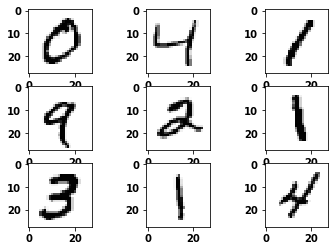

In [2]:
# Let's import the data and visualize a sample #
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Target:', y_train[1:10])
fig = plt.figure(33)
for i in range(1,10):
    fig.add_subplot(330+i)
    plt.imshow(X_train[i], cmap='Greys')

In [3]:
# Let's check out the shape of the data #
X_train[0].shape

(28, 28)

In [4]:
# Let's check out the data type #
type(X_train[0][0][0])

numpy.uint8

In [5]:
# Let's check if all data shapes are the same 28x28 pixels #
set([i.shape for i in X_train])

{(28, 28)}

In [6]:
# Let's normalize the data (pixel values of images are between 0 and 255) #
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Let's one-hot encode our Y's #
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
# These are a vector of probabilities, based on what category it will fall underneath #
# Classification with deep learning will always make one neuron for each category #
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
# Let's check out the image format #
keras.backend.image_data_format()

'channels_last'

In [10]:
# Let's check out the shape of our X_train dataset #
X_train.shape

(60000, 28, 28)

In [11]:
# To explicitly say there's 1 channel, we need to add a 1 to the shape #
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [12]:
# Let's check out the shape of our X_train dataset again #
X_train.shape

(60000, 28, 28, 1)

In [13]:
# Let's check out the shape of our y_train dataset #
y_train.shape

(60000, 10)

Now we can create the Multi-Layer Perceptron (MLP) model. This involves an input layer, a layer to flatten the data, and an output layer. To build this, we will use the sequential model. That will allow us to add layers in a sequential list, compile the model with an optimizer, loss function, and scorint metric; and ultimately fit the model to the data.

It should be noted that the first layer has an input_shape parameter. Because we are setting 24 output neurons, and 28 inputs to those neurons, the output of that layer is 28x28x24.

The next layer, flatten, simply turns the 3d input into a vector of length 18816 (28x28x24 = 18816).

In the last layer, we have a dense layer with an output shape of 10 neurons and a softmax activation. This results in 10 output neurons that encode probabilities of each class (digits 0-9).

In [14]:
# Let's instantiate our model #
mlp = Sequential([
    Dense(24, input_shape=(28,28,1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

W0509 16:03:25.607047  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0509 16:03:25.627058  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0509 16:03:25.636837  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
# Let's check out the model summary #
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 24)        48        
_________________________________________________________________
flatten_1 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                188170    
Total params: 188,218
Trainable params: 188,218
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Let's compile our model (we are doing a multi-class classification to minimize loss) #
mlp.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

W0509 16:03:25.766531  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0509 16:03:25.769552  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
# Let's fit our model #
mlp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

W0509 16:03:25.886556  9988 deprecation.py:323] From C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0509 16:03:25.976852  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 244us/step - loss: 0.5129 - acc: 0.8684 - val_loss: 0.3130 - val_acc: 0.9113
Epoch 2/3
60000/60000 [==============================] - 14s 239us/step - loss: 0.3161 - acc: 0.9099 - val_loss: 0.2903 - val_acc: 0.9174
Epoch 3/3
60000/60000 [==============================] - 14s 228us/step - loss: 0.2971 - acc: 0.9154 - val_loss: 0.2862 - val_acc: 0.9194


In [18]:
# Let's calculate our loss and accuracy #
loss, accuracy = mlp.evaluate(X_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 1s 82us/step

Loss: 0.2861699765682221
Accuracy: 0.9194


In [19]:
# Let's instantiate our model again (changing to 48 output neurons in the first layer) #
mlp_48 = Sequential([
    Dense(48, input_shape=(28,28,1), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])

In [20]:
# Let's compile our model #
mlp_48.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy, 
           metrics=['accuracy'])

In [21]:
# Let's fit our model with a validation split #
mlp_48.fit(X_train, y_train, validation_split=0.3, shuffle=True, epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 26s 611us/step - loss: 0.5799 - acc: 0.8598 - val_loss: 0.3541 - val_acc: 0.8992
Epoch 2/3
42000/42000 [==============================] - 28s 677us/step - loss: 0.3333 - acc: 0.9044 - val_loss: 0.3166 - val_acc: 0.9089
Epoch 3/3
42000/42000 [==============================] - 25s 590us/step - loss: 0.3070 - acc: 0.9114 - val_loss: 0.3029 - val_acc: 0.9141


In [22]:
# Let's calculate our loss and accuracy #
loss, accuracy = mlp_48.evaluate(X_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 2s 160us/step

Loss: 0.2916765928775072
Accuracy: 0.9171


Let's continue by creating a Convolutional Neural Network (CNN). This should not only train faster, but should obtain better scores. Let's play around with the CNN parameters to see how tuning can improve our model's performance.

In [23]:
# Let's instantiate our model #
cnn = Sequential([
    Conv2D(2, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

W0509 16:05:30.496526  9988 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [24]:
# Let's check out the model summary #
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 2)         52        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 2)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                18496     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 19,198
Trainable params: 19,198
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Let's compile our model #
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [26]:
# Let's fit our model with a validation split #
cnn.fit(X_train, y_train, validation_split=.3, epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 16s 389us/step - loss: 0.2706 - acc: 0.9175 - val_loss: 0.1822 - val_acc: 0.9464
Epoch 2/3
42000/42000 [==============================] - 17s 415us/step - loss: 0.1260 - acc: 0.9622 - val_loss: 0.1235 - val_acc: 0.9642
Epoch 3/3
42000/42000 [==============================] - 14s 335us/step - loss: 0.0990 - acc: 0.9704 - val_loss: 0.1191 - val_acc: 0.9646


In [27]:
# Let's calculate our loss and accuracy #
loss, accuracy = cnn.evaluate(X_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 1s 121us/step

Loss: 0.1010375030733645
Accuracy: 0.9687


In [28]:
# Let's instantiate our model again (changing to 8 output neurons in the first layer) #
cnn_8 = Sequential([
    Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)),
     Conv2D(16, (3, 3), activation='relu'),
     Dropout(.25),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
     Dropout(.25),
    Dense(10, activation='softmax')
])

W0509 16:06:20.206864  9988 deprecation.py:506] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# Let's check out the model summary #
cnn_8.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        1168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                123968    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [30]:
# Let's compile our model #
cnn_8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [31]:
# Let's fit our model with a validation split #
cnn_8.fit(X_train, y_train, validation_split=.3, epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 37s 870us/step - loss: 0.2265 - acc: 0.9302 - val_loss: 0.0824 - val_acc: 0.9760
Epoch 2/3
42000/42000 [==============================] - 42s 990us/step - loss: 0.0884 - acc: 0.9736 - val_loss: 0.0710 - val_acc: 0.9776
Epoch 3/3
42000/42000 [==============================] - 41s 973us/step - loss: 0.0680 - acc: 0.9795 - val_loss: 0.0557 - val_acc: 0.9834


In [32]:
# Let's calculate our loss and accuracy #
loss, accuracy = cnn_8.evaluate(X_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 2s 162us/step

Loss: 0.04308855373323895
Accuracy: 0.9865


In [33]:
# Let's create a vector of probabilities #
y_pred_probas = cnn_8.predict(X_test)

y_pred_probas[0]

array([2.9275881e-08, 3.5568501e-08, 9.0037975e-06, 9.0894773e-06,
       4.4193480e-09, 2.6133952e-07, 1.7786893e-11, 9.9997759e-01,
       1.7684272e-06, 2.1261133e-06], dtype=float32)

In [34]:
# The 8th value in the pred_probas above is close to 1 just like the actual y_test value #
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [35]:
# Saves model in same directory #
cnn.save('cnn.h5')

In [36]:
# If we re-run the fit, it will continue training where it left off previously #
cnn2 = keras.models.load_model('./cnn.h5')

cnn2.fit(X_train, y_train, validation_split=.3, epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 14s 328us/step - loss: 0.0830 - acc: 0.9746 - val_loss: 0.0935 - val_acc: 0.9722
Epoch 2/3
42000/42000 [==============================] - 13s 316us/step - loss: 0.0726 - acc: 0.9789 - val_loss: 0.0925 - val_acc: 0.9731
Epoch 3/3
42000/42000 [==============================] - 16s 375us/step - loss: 0.0650 - acc: 0.9806 - val_loss: 0.0884 - val_acc: 0.9737


In [37]:
# Let's check our loss and accuracy again #
loss, accuracy = cnn2.evaluate(X_test, y_test)
print('\nLoss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 2s 169us/step

Loss: 0.07341869105740916
Accuracy: 0.977


Note: what we did above can be very useful if a specific accuracy figure is needed as we can just set a while loop to keep on training until we reach our goal.